a. Translasi Citra

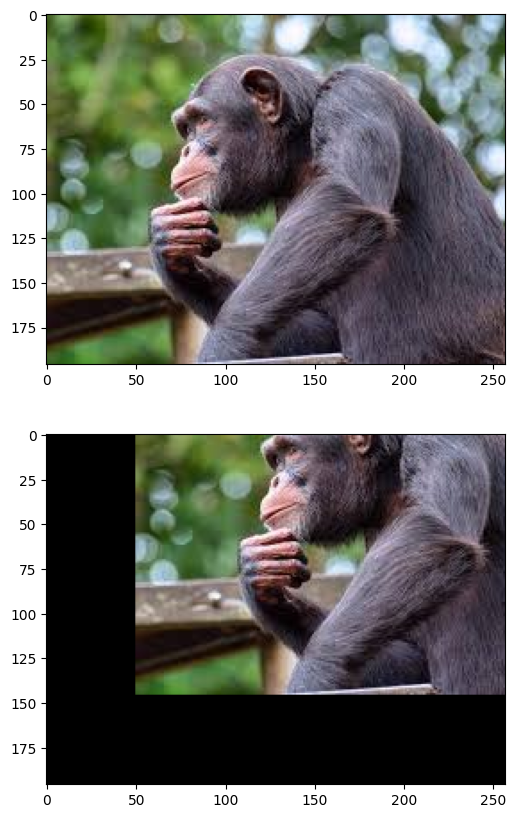

In [4]:
import imageio.v3 as img
import numpy as np
import matplotlib.pyplot as plt

def Translasi(image, shiftX, shiftY):
    imgTranslasi = np.roll(image, shift=shiftY, axis=0)  # Geser vertikal
    imgTranslasi = np.roll(imgTranslasi, shift=shiftX, axis=1)  # Geser horizontal

    # Mengisi bagian yang kosong dengan warna hitam (0)
    if shiftY > 0:
        imgTranslasi[:shiftY, :] = 0  # Bagian atas jika geser ke bawah
    elif shiftY < 0:
        imgTranslasi[shiftY:, :] = 0  # Bagian bawah jika geser ke atas
    if shiftX > 0:
        imgTranslasi[:, :shiftX] = 0  # Bagian kiri jika geser ke kanan
    elif shiftX < 0:
        imgTranslasi[:, shiftX:] = 0  # Bagian kanan jika geser ke kiri

    return imgTranslasi

image = img.imread("/content/Rahman.jpeg")

imgResult = Translasi(image, shiftX=50, shiftY=-50)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(image)
plt.subplot(2,1,2)
plt.imshow(imgResult)
plt.show()


b. Mirroring

<ipython-input-5-7d0dd605985f>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = img.imread(path)


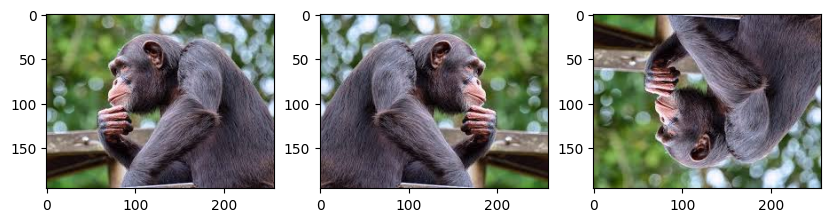

In [5]:
import numpy as np
import imageio as img
import matplotlib.pyplot as plt

path = '/content/Rahman.jpeg'
image = img.imread(path)

height, width = image.shape[:2]
horizontal = np.zeros_like(image)
vertical = np.zeros_like(image)

for y in range(height):
    for x in range(width):
        horizontal[y, x] = image[y, width - 1 - x]

for y in range(height):
    for x in range(width):
        vertical[y, x] = image[height - 1 - y, x]

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)

plt.subplot(1, 3, 2)
plt.imshow(horizontal)

plt.subplot(1, 3, 3)
plt.imshow(vertical)

plt.show()


c. Rotasi Citra

<ipython-input-6-d63d225fd65c>:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = img.imread('/content/Rahman.jpeg')


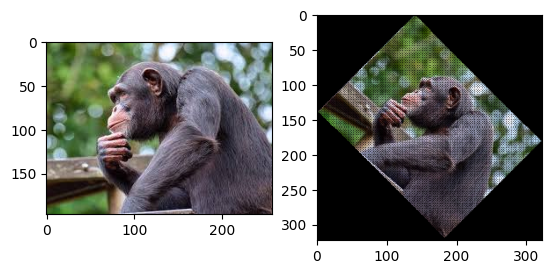

In [6]:
import imageio as img
import numpy as np
import matplotlib.pyplot as plt

def rotateImage(image, degree):
    radian_deg = np.radians(degree)
    cos_deg, sin_deg = np.cos(radian_deg), np.sin(radian_deg)

    height, width = image.shape[:2]
    max_dim = int(np.sqrt(height**2 + width**2))
    outputImage = np.zeros((max_dim, max_dim, 3), dtype=image.dtype)

    centerY, centerX = max_dim//2, max_dim//2

    for y in range(-height//2, height//2):
        for x in range(-width//2, width//2):
            newX = int(cos_deg * x - sin_deg * y) + centerX
            newY = int(sin_deg * x + cos_deg * y) + centerY

            if 0 <= newX < max_dim and 0 <= newY < max_dim:
                outputImage[newY, newX] = image[y + height//2, x + width//2]

    return outputImage

image = img.imread('/content/Rahman.jpeg')

rotated_image = rotateImage(image, 45)

plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.imshow(rotated_image)

plt.show()


d. Zooming

<ipython-input-7-6192331c8854>:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = img.imread('/content/Rahman.jpeg')


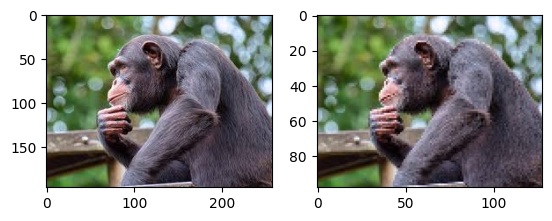

In [7]:
import numpy as np
import imageio as img
import matplotlib.pyplot as plt

def zoomPlus(image, factor):
    height, width = image.shape[:2]
    new_height = int(height / factor)
    new_width = int(width / factor)
    imgZoom = np.zeros((new_height, new_width, 3), dtype=image.dtype)

    for y in range(new_height):
        for x in range(new_width):
            ori_y = int(y * factor)
            ori_x = int(x * factor)
            ori_y = min(ori_y, height - 1)
            ori_x = min(ori_x, width - 1)
            imgZoom[y, x] = image[ori_y, ori_x]

    return imgZoom

image = img.imread('/content/Rahman.jpeg')
skala = 2.0
imgZoom = zoomPlus(image, skala)
img.imwrite("/content/Monyet.jpeg", imgZoom)

plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.imshow(imgZoom)

plt.show()